In [1]:
import nltk

In [2]:
# nltk.download_shell()

In [3]:
messages = [line.strip() for line in open("smsspamcollection/SMSSpamCollection")]

In [4]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [5]:
len(messages)

5574

In [6]:
# checking messages and enumerating them
for message_no, mess in enumerate(messages[:10]):
    print(message_no,mess)
    print()

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

1 ham	Ok lar... Joking wif u oni...

2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

3 ham	U dun say so early hor... U c already then say...

4 ham	Nah I don't think he goes to usf, he lives around here though

5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv

6 ham	Even my brother is not like to speak with me. They treat me like aids patent.

7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune

8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341.

# Data Analysis

In [7]:
import pandas as pd

In [8]:
mess_df = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names=['label', 'message'])

In [9]:
mess_df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
mess_df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
mess_df['Length'] = mess_df['message'].apply(len)

In [12]:
mess_df.drop('Length',axis=1).groupby(by='label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [13]:
mess_df.drop('Length',axis=1).describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


# Visualization

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: ylabel='Frequency'>

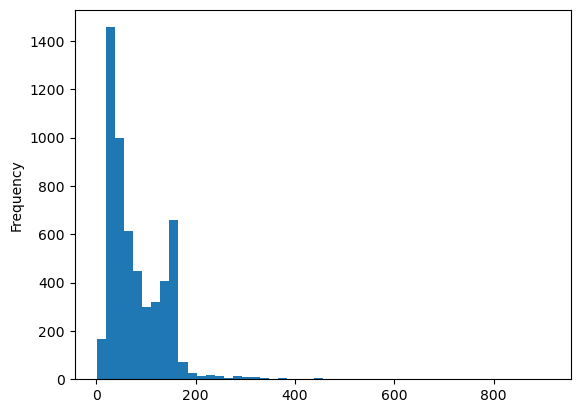

In [15]:
mess_df['Length'].plot(bins=50, kind='hist')

In [16]:
mess_df.describe().loc['max']

Length    910.0
Name: max, dtype: float64

In [17]:
mess_df[mess_df['Length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

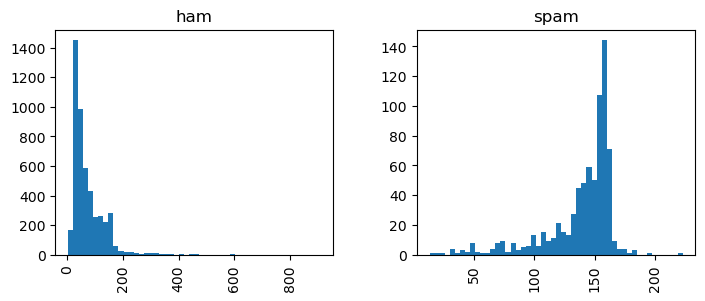

In [18]:
mess_df.hist( bins=50, column='Length',by='label',figsize=(8,3))

Spam messages have more length than ham

# Create anallyser that removes the useless words + punctuations

In [19]:
import string

In [20]:
# Remove Punctuations
mess_1 = mess_df['message'][0]

In [21]:
nopunc_1 = [mess for mess in mess_1 if mess.lower() not in string.punctuation]

In [22]:
# remove uselss words from stopwords

In [23]:
from nltk.corpus import stopwords

In [24]:
nostops = [mess for mess in mess_1 if mess.lower() not in stopwords.words()]

In [25]:
print(len(nostops))
print(len(nopunc_1))

47
102


In [26]:
def text_analyzer(mess):
    # rmeove puncs, remove stop wrods and then convert again to complete message using.join
    nopunc = [c for c in mess if c.lower() not in string.punctuation]
    nopunc = ''.join(nopunc) # convert chars to a whole message
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [27]:
mess_df['message'].head(5).apply(text_analyzer)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

# Count Vectorizer

In [63]:
from sklearn.feature_extraction.text import CountVectorizer

In [64]:
bow_transformer = CountVectorizer(analyzer=text_analyzer).fit(mess_df['message'])

In [65]:
print(len(bow_transformer.vocabulary_))

11425


In [66]:
# testing bag of words on a message

In [67]:
mess_t = mess_df['message'][53]
print(mess_t)

Wow. I never realized that you were so embarassed by your accomodations. I thought you liked it, since i was doing the best i could and you always seemed so happy about "the cave". I'm sorry I didn't and don't have more to give. I'm sorry i offered. I'm sorry your room was so embarassing.


In [68]:
bow_t = bow_transformer.transform([mess_t])

In [69]:
print(bow_t)
print(bow_t.shape)

  (0, 2352)	3
  (0, 4352)	1
  (0, 4492)	1
  (0, 4641)	1
  (0, 5014)	1
  (0, 5382)	1
  (0, 5738)	1
  (0, 6014)	1
  (0, 6123)	1
  (0, 6287)	1
  (0, 6288)	1
  (0, 6850)	1
  (0, 7035)	1
  (0, 7801)	1
  (0, 8410)	1
  (0, 8547)	1
  (0, 9232)	1
  (0, 9460)	1
  (0, 9619)	1
  (0, 9788)	1
  (0, 9941)	3
  (0, 10451)	1
(1, 11425)


In [70]:
print(bow_transformer.get_feature_names_out()[9941])
print(bow_transformer.get_feature_names_out()[2352])

sorry
Im


In [71]:
# Lets check all messages bow

In [72]:
messages_bow = bow_transformer.transform(mess_df['message'])

In [74]:
print(messages_bow.nnz)
print("sparse matrix size",messages_bow.shape)

50548
sparse matrix size (5572, 11425)


In [80]:
# checking sparsity
print(100*(messages_bow.nnz)/(messages_bow.shape[0]*messages_bow.shape[1]))

0.07940295412668218


# TF-IDF

In [81]:
from sklearn.feature_extraction.text import TfidfTransformer

In [82]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [84]:
# for a particular message t

In [85]:
tfidf_t = tfidf_transformer.transform(bow_t)

In [88]:
print(tfidf_t)

  (0, 10451)	0.15409237946241383
  (0, 9941)	0.47222860323202553
  (0, 9788)	0.1687378019497454
  (0, 9619)	0.21562903516411266
  (0, 9460)	0.1604037099969354
  (0, 9232)	0.21562903516411266
  (0, 8547)	0.23376904036778015
  (0, 8410)	0.1604037099969354
  (0, 7801)	0.1974890299604451
  (0, 7035)	0.15059779674607784
  (0, 6850)	0.13503401702981582
  (0, 6288)	0.23376904036778015
  (0, 6287)	0.21562903516411266
  (0, 6123)	0.11338063521633023
  (0, 6014)	0.13891824211315076
  (0, 5738)	0.14751535633568108
  (0, 5382)	0.23376904036778015
  (0, 5014)	0.1547230243287562
  (0, 4641)	0.15005817978211444
  (0, 4492)	0.23376904036778015
  (0, 4352)	0.1974890299604451
  (0, 2352)	0.3097683407683135


In [92]:
#  checking u and university ifidf in the whole document
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

3.2800524267409408
8.527076498901426


In [87]:
# for all messages

In [94]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [95]:
print(messages_tfidf.shape)

(5572, 11425)


# Time to Train on TFIDF as Features!

In [96]:
from sklearn.model_selection import train_test_split

In [113]:
msg_train, msg_test, label_train, label_test = train_test_split(mess_df['message'],mess_df['label'],test_size=0.2)

In [114]:
print(msg_train.shape)
print(msg_test.shape)

(4457,)
(1115,)


In [104]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

In [107]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_analyzer)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
]
)

In [108]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_analyzer at 0x000001E8E838A8E0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [109]:
predictions = pipeline.predict(msg_test)

In [110]:
from sklearn.metrics import classification_report, confusion_matrix

In [111]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1006
        spam       0.71      1.00      0.83       109

    accuracy                           0.96      1115
   macro avg       0.85      0.98      0.90      1115
weighted avg       0.97      0.96      0.96      1115



In [112]:
mess_df.shape

(5572, 3)